In [1]:
# we have 28*28 grid which is 784 neurons

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x,y=keras.datasets.mnist.load_data()

In [4]:
x_train,y_train=x
x_test,y_test=y

In [5]:
len(x_train),len(x_test)

(60000, 10000)

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

5
0
4
1
9


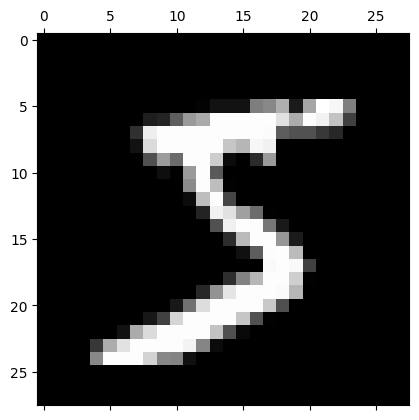

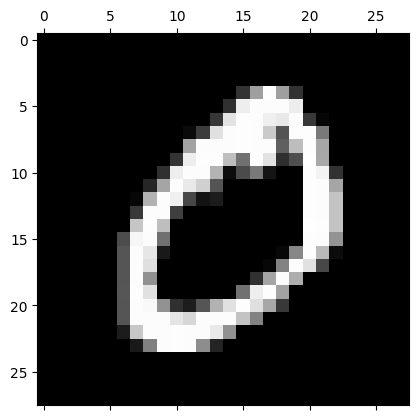

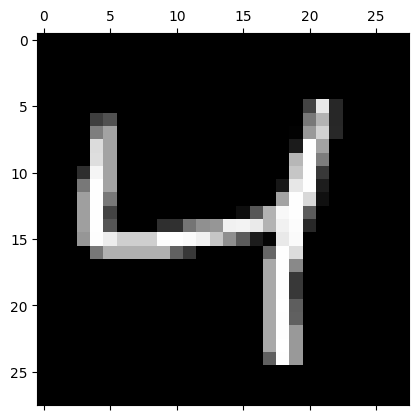

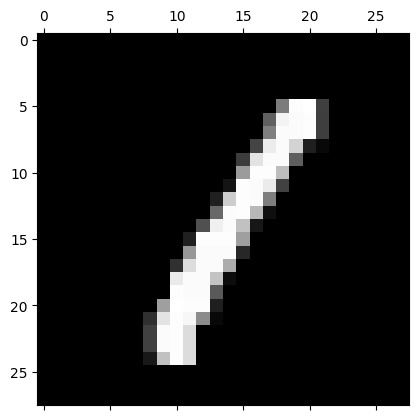

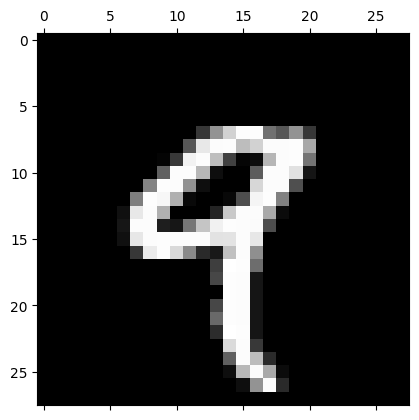

In [8]:
for i in range(5):
    plt.matshow(x_train[i])
    print(y_train[i])
    plt.gray()

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
# we need to flatten it for feeding to neurons->60000,784
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [12]:
x_train_flat.shape
x_test_flat.shape

(10000, 784)

In [13]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    # keras.layer.Dense(Output_shape,input_shape)
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4661 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3033 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9256


In [16]:
# for more accuracy we need to scale the values

2


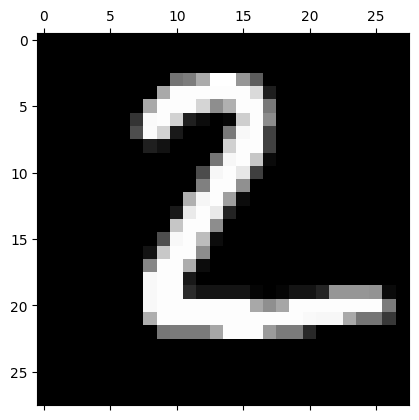

In [17]:
plt.matshow(x_test[1])
print(y_test[1])
plt.gray()

In [18]:
y_pre = model.predict(x_test_flat)

313/313 [==============================] - 0s 1ms/step


In [19]:
y_pre[1]

array([5.3367954e-01, 7.0554055e-03, 9.9956954e-01, 3.4154272e-01,
       8.0925427e-10, 9.0669543e-01, 9.2059767e-01, 8.4674515e-13,
       1.8122047e-01, 1.2824580e-09], dtype=float32)

In [20]:
np.argmax(y_pre[1])

2

In [21]:
y_pre_labels = [np.argmax(i) for i in y_pre]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pre_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    7,    7,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,   10,  921,   12,    8,    6,   13,   11,   45,    2],
       [   4,    0,   20,  899,    0,   43,    2,   12,   24,    6],
       [   1,    1,    5,    0,  925,    0,   10,    3,   10,   27],
       [   8,    3,    2,   17,   11,  798,   15,    5,   29,    4],
       [  11,    3,    7,    1,    8,   14,  910,    2,    2,    0],
       [   1,    6,   23,    5,   10,    0,    0,  954,    5,   24],
       [   6,    8,    6,   15,    9,   30,    9,   12,  874,    5],
       [  11,    7,    1,   10,   38,    9,    0,   24,    9,  900]])>

In [23]:
# for hidden layers

In [24]:
model = keras.Sequential([
    # keras.layer.Dense(Output_shape,input_shape)
    keras.layers.Dense(200,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3743 - accuracy: 0.8988
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1865 - accuracy: 0.9456
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1325 - accuracy: 0.9610
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002 - accuracy: 0.9712
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0777 - accuracy: 0.9774


In [25]:
model = keras.Sequential([
    # keras.layer.Dense(Output_shape,input_shape)
    keras.layers.Dense(200,input_shape=(784,),activation='tanh'),
    keras.layers.Dense(100,input_shape=(784,),activation='tanh'),
    keras.layers.Dense(50,input_shape=(784,),activation='tanh'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2475 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0796 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0616 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9852


In [26]:
# if we dont want to flatten the array

In [27]:
model = keras.Sequential([
    # keras.layer.Dense(Output_shape,input_shape)
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1279 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0892 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9833


In [29]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0748 - accuracy: 0.9764


[0.07476521283388138, 0.9764000177383423]